In [5]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=0c3f1d8d05daf6b3b79400adf1b5fc402aad5f9b5759c88339cf58da149a157f
  Stored in directory: c:\users\tetiana matviichuk\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [8]:
import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting
import apyori

In [2]:
# Read and drop ID Columns
data = pd.read_csv("Groceries_dataset.csv")
df = data.copy()

In [9]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [10]:
df.info() # Checking data type information for validation purposes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [11]:
df.isnull().sum().sort_values(ascending=False) ## Checking availability of NULL values

Member_number      0
Date               0
itemDescription    0
dtype: int64

## Data Pre-Processing:

1. Changing datatype of Date Column to date type

In [12]:
df['Date'] = pd.to_datetime(df['Date']) ## Type-Conversion from Object to Dateime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-12-

In [13]:
df.head() ## Schema check

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


## Performing EDA:

1. Top 10 Sold Items:

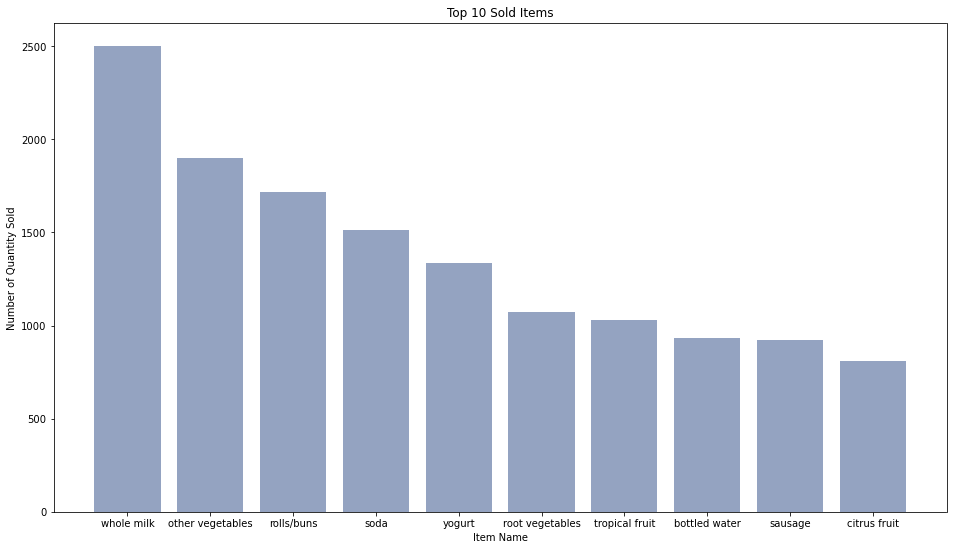

In [14]:
## Creating distribution of Item Sold

Item_distr = df.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency', ascending=False).head(10)

## Declaring variables

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size

plt.figure(figsize=(16,9))

# Create bars
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

2. Month-Year Sales:

In [15]:
df_date=df.set_index(['Date']) ## Setting date as index for plotting purpose
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

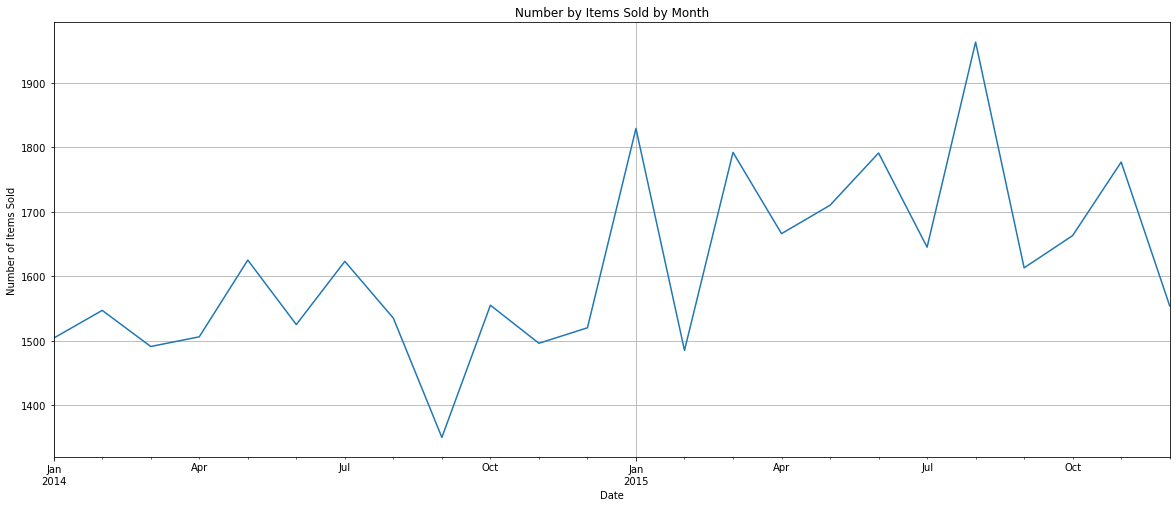

In [16]:
df_date.resample("M")['itemDescription'].count().plot(
    figsize = (20,8), 
    grid = True, 
    title = "Number by Items Sold by Month").set(xlabel = "Date", 
                                                 ylabel = "Number of Items Sold")

## Apriori Implementation:

1. Data Preparation:

In [17]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False) ## Selecting only required variables for modelling
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip() # Removing white spaces if any
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [18]:
transactions = [a[1]['itemDescription'].tolist() 
                for a in list(cust_level.groupby(['Member_number']))] 
## Combing all the items in list format for each cutomer

In [19]:
from apyori import apriori ## Importing apriori package
rules = apriori(transactions = transactions, 
                min_support = 0.002, 
                min_confidence = 0.05, 
                min_lift = 3, 
                min_length = 2, 
                max_length = 2) ## Model Creation

In [21]:
results = list(rules) ## Storing results in list format for better visualisation

In [22]:
results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [23]:
## Creating user-defined function for arranging the results obtained from model into readable format

def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [24]:
resultsinDataFrame.nlargest(n=10, columns="Lift") ## Showing best possible scenarios

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,potato products,beef,0.002565,0.454545,3.802185
2,canned fruit,coffee,0.002309,0.428571,3.728954
4,flour,mayonnaise,0.002309,0.063380,3.338599
6,sparkling wine,waffles,0.002565,0.217391,3.150154
5,rice,napkins,0.003079,0.244898,3.011395
3,meat spreads,domestic eggs,0.003592,0.400000,3.004239


Support: This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.

Confidence: This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.

Lift: This says how likely item Y is purchased when item X is purchased while controlling for how popular item Y is.